# Weather Python Project
----
See ReadMe for more information

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = '&units=imperial'

#to hold location info
inf = []

#loop through cities and get pertinent info
for index, city in enumerate(cities, start=1):
        print(f'Processing Record {index} | {city}')
        query_url = url + "appid=" + api_key + "&q=" + city + units
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        try:
            inf.append((city, weather_json['clouds']['all'], weather_json['sys']['country'], 
                   weather_json['dt'], weather_json['main']['humidity'], weather_json['coord']['lat'],
                   weather_json['coord']['lon'], weather_json['main']['temp_max'],
                   weather_json['wind']['speed']))
        except:
            print('City not found. Skipping...')

Processing Record 1 | port alfred
Processing Record 2 | port blair
Processing Record 3 | vaitupu
City not found. Skipping...
Processing Record 4 | cape town
Processing Record 5 | melfi
Processing Record 6 | new norfolk
Processing Record 7 | taolanaro
City not found. Skipping...
Processing Record 8 | dubbo
Processing Record 9 | thompson
Processing Record 10 | luderitz
Processing Record 11 | hilo
Processing Record 12 | jamestown
Processing Record 13 | ancud
Processing Record 14 | khatanga
Processing Record 15 | mantua
Processing Record 16 | carnarvon
Processing Record 17 | newport
Processing Record 18 | taoudenni
Processing Record 19 | mataura
Processing Record 20 | ponta delgada
Processing Record 21 | ilulissat
Processing Record 22 | tasiilaq
Processing Record 23 | punta arenas
Processing Record 24 | puerto ayora
Processing Record 25 | beni suef
Processing Record 26 | butaritari
Processing Record 27 | kodiak
Processing Record 28 | camocim
Processing Record 29 | buraydah
Processing Recor

Processing Record 227 | thinadhoo
Processing Record 228 | santa quiteria
Processing Record 229 | ornskoldsvik
Processing Record 230 | anadyr
Processing Record 231 | fulitun
City not found. Skipping...
Processing Record 232 | port lincoln
Processing Record 233 | grindavik
Processing Record 234 | matamoros
Processing Record 235 | zaysan
Processing Record 236 | bonfim
Processing Record 237 | wawa
Processing Record 238 | yarega
Processing Record 239 | constitucion
Processing Record 240 | the valley
Processing Record 241 | awjilah
Processing Record 242 | wanning
Processing Record 243 | molteno
Processing Record 244 | yar-sale
Processing Record 245 | haines junction
Processing Record 246 | san felipe
Processing Record 247 | port augusta
Processing Record 248 | kawana waters
City not found. Skipping...
Processing Record 249 | hasaki
Processing Record 250 | tsihombe
City not found. Skipping...
Processing Record 251 | zakamensk
Processing Record 252 | severo-kurilsk
Processing Record 253 | nair

Processing Record 450 | kampot
Processing Record 451 | sorvag
City not found. Skipping...
Processing Record 452 | mahibadhoo
Processing Record 453 | mys shmidta
City not found. Skipping...
Processing Record 454 | el alto
Processing Record 455 | umm bab
Processing Record 456 | tual
Processing Record 457 | palmares do sul
Processing Record 458 | pangody
Processing Record 459 | general pico
Processing Record 460 | shumikha
Processing Record 461 | nogliki
Processing Record 462 | kearney
Processing Record 463 | broome
Processing Record 464 | pangnirtung
Processing Record 465 | zlobin
Processing Record 466 | tierra colorada
Processing Record 467 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 468 | oistins
Processing Record 469 | tidore
City not found. Skipping...
Processing Record 470 | zinapecuaro
Processing Record 471 | dzaoudzi
Processing Record 472 | liverpool
Processing Record 473 | kijang
Processing Record 474 | nam tha
City not found. Skipping...
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
#create df from tuples
location_df = pd.DataFrame(inf, columns=('City', 'Cloudiness', 'Country', 
                                         'Date', 'Humidity', 'Lat', 'Lng', 
                                         'Max Temp(F)', 'Wind Speed(mph)'))
location_df.to_csv('raw_loc_data.csv')
location_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp(F),Wind Speed(mph)
0,port alfred,69,ZA,1570476310,91,-33.59,26.89,59.00,1.99
1,port blair,72,IN,1570476104,75,11.67,92.75,82.67,7.99
2,cape town,20,ZA,1570476300,82,-33.93,18.42,63.00,8.05
3,melfi,90,IT,1570476401,87,41.00,15.66,62.60,11.41
4,new norfolk,40,AU,1570476319,66,-42.78,147.06,50.00,9.17


In [5]:
location_df.count()

City          558
Cloudiness    558
Country       558
Date          558
Humidity      558
Lat           558
Lng           558
Max Temp      558
Wind Speed    558
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

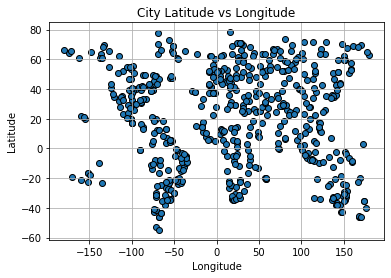

In [25]:
#This provides a scatter plot that maps our cities. we can clearly see that we got a sample from all across the globe
plt.scatter(location_df['Lng'], location_df['Lat'], edgecolor='k')
plt.grid(True)
plt.title('City Latitude vs Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

#save and then show chart
plt.savefig('mappedcities.png')
plt.show()

#### Latitude vs. Temperature Plot

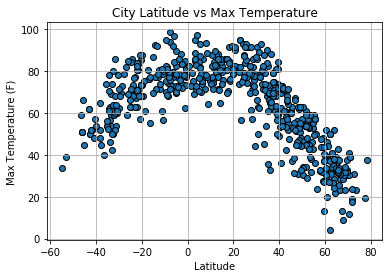

In [18]:
#set up scatter plot
plt.scatter(location_df['Lat'], location_df['Max Temp(F)'], edgecolor='k')
plt.grid(True)
plt.title('City Latitude vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

#save and then show chart
plt.savefig('latitudevstemperature.png')
plt.show()

#### Latitude vs. Humidity Plot

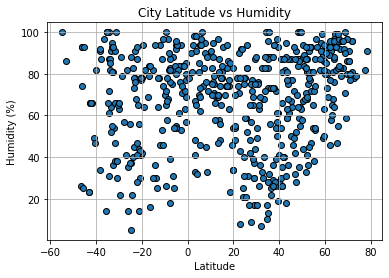

In [17]:
#set up chart
plt.scatter(location_df['Lat'], location_df['Humidity'], edgecolor='k')
plt.grid(True)
plt.title('City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

#save and then show chart
plt.savefig('latitudevshumidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

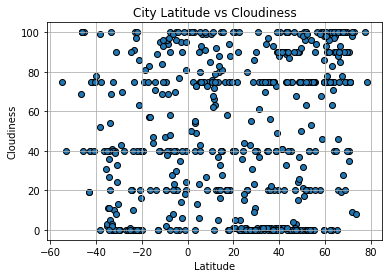

In [20]:
#set up chart
plt.scatter(location_df['Lat'], location_df['Cloudiness'], edgecolor='k')
plt.grid(True)
plt.title('City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

#save and then show chart
plt.savefig('latitudevscloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

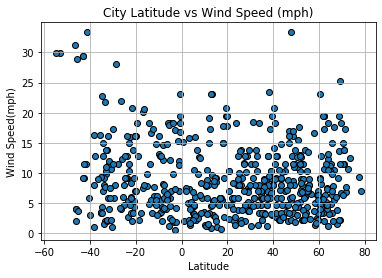

In [21]:
#set up chart
plt.scatter(location_df['Lat'], location_df['Wind Speed(mph)'], edgecolor='k')
plt.grid(True)
plt.title('City Latitude vs Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')

#save and then show chart
plt.savefig('latitudevswindspeed.png')
plt.show()

Text(0, 0.5, 'Wind Speed(mph)')

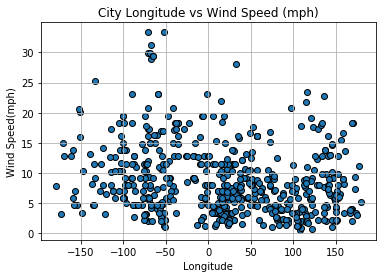

In [22]:
#set up chart
plt.scatter(location_df['Lng'], location_df['Wind Speed(mph)'], edgecolor='k')
plt.grid(True)
plt.title('City Longitude vs Wind Speed (mph)')
plt.xlabel('Longitude')
plt.ylabel('Wind Speed(mph)')

# #save and then show chart
# plt.savefig('latitudevswindspeed.png')
# plt.show()

# Conclusions:
    1) As expected, there is a clear correlation between max temperature and city latitude
    2) There is no clear correlation between wind speed and either latitude or longitude.
    3) There is no clear correlation between cloudiness and city latitude; however, the shape of the scatter plot does seem to indicate that this is based more on an estimation or possibly a range. The plots are grouped at certain points on the scale: 0, 20, 40, 75, and 100